# Fraud_Detection



**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Librerias

In [ ]:
!pip install imbalanced-learn
!pip install joblib
!pip install pydotplus
!pip install pydot
!pip install graphviz
!pip install Pillow
!pip install Image

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from datetime import datetime 
import time
import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 7.9MB 6.4MB/s 
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=5cb41e6825be9834bcf157df82eff6345de37e82d371be7bc899173f628beb05
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built Image


## Carga Datos

In [ ]:
#Lectura del archivo en Github
#Header: Identificación del primer registro como la cabecera de la base de datos
#Index: Identificador unico de la base de datos
#Visualización de 5 registros    
df0 = pd.read_excel(r"https://github.com/joatamayoav/Trabajo_Final_Analitica_Predictiva/blob/main/fraud_data.xlsx?raw=true"

    )

df0.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
#Renombra variables en de mayúsculas a minúsculas
#Cambiar variable y de "default payment next month" a "Variable dependiente"
df0.rename(columns=lambda x: x.lower(), inplace=True)
df0.rename(columns={"class":"Variable dependiente"}, inplace=True) 
df0.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,Variable dependiente
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
# Se crea copia del Dataframe original para no dañarlo
df = df0.copy()
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,Variable dependiente
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


# Analisis descriptivo

In [ ]:
#dtypes: Visualizar variables y tipo de variables de la data
#df.shape: Cuantas variables y registros hay en la data
#Estatidisticas básicas de la data
print(df.dtypes)
print(df.shape)
df.describe()

v1                      float64
v2                      float64
v3                      float64
v4                      float64
v5                      float64
v6                      float64
v7                      float64
v8                      float64
v9                      float64
v10                     float64
v11                     float64
v12                     float64
v13                     float64
v14                     float64
v15                     float64
v16                     float64
v17                     float64
v18                     float64
v19                     float64
v20                     float64
v21                     float64
v22                     float64
v23                     float64
v24                     float64
v25                     float64
v26                     float64
v27                     float64
v28                     float64
amount                  float64
Variable dependiente      int64
dtype: object
(21693, 30)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,Variable dependiente
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,0.067173,-0.094268,-0.000667,-0.091499,-0.003917,-0.055079,-0.098357,-0.033488,0.021861,-0.001762,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,1.154227,1.364933,0.989655,1.356199,0.916582,1.096472,1.424975,0.936769,0.843902,0.727979,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,-3.995739,-18.553697,-3.844974,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-4.395283,-21.024817,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,-0.739193,-0.438730,-0.634030,-0.438416,-0.582193,-0.492689,-0.498984,-0.513216,-0.444441,-0.209710,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,0.005596,0.126666,-0.018642,0.044870,0.048753,0.059504,-0.075797,-0.019269,0.021719,-0.057330,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,0.786044,0.613676,0.652241,0.490003,0.642463,0.525327,0.389992,0.494700,0.484930,0.139059,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,12.018913,3.966626,4.099352,6.441021,5.720479,6.442798,6.609366,3.790316,4.851255,13.119819,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


## Análisis Exploratorio

In [ ]:
# Identificación de nulos por variable
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Variable dependiente,amount,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v1
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


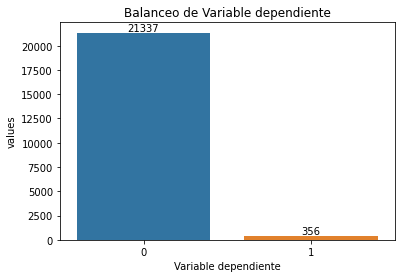

In [ ]:
# Creamos dataframe Variable dependiente se le asigna a df1
# Dimensiones del plot (6,4)
# Asignamos titulo
# Definición de colores}
# Se asigna la variables del gráfico x = Variable dependiente y y = conteo 
#
temp = df["Variable dependiente"].value_counts()
df1 = pd.DataFrame({'Variable dependiente': temp.index,'values': temp.values})
plt.figure(figsize = (6,4))
plt.title('Balanceo de Variable dependiente')
sns.set_color_codes("pastel")
graph = sns.barplot(x = 'Variable dependiente', y="values", data=df1)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black',
                    xytext = (0, 0), 
                    textcoords = 'offset points'
                    )
locs, labels = plt.xticks()
plt.show()

# Modelación
##Metricas - Gráficos - Dataset

In [ ]:
# Definición del dataFrame de metricas
metrics = pd.DataFrame(index=['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score', 'Tiempo de ejecución'],
                       columns=['BernoulliNB', 'GaussianNB', 'LogisticRegresion', 'kNN', 'DecisionTree', 'AdaBoost', 'RandomForest', 'GradientBoosting', 'RedesNeuronales' , 'SVMs'])
metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roc_auc_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiempo de ejecución,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Definición Gráfica del Modelo

In [ ]:
# Creación de la matriz de confusión
# Se define la función "plot_confusion_matrix" se le asignan variables y parametros a imprimir
# La primera parte del codigo que se identifica con las siglas plt es para configuración de variables y aspecto de grafico 
# Por ejemplo: plt.imshow: define el grado de difuminasión del grafico de confusión
# En el for se hace la identificación de positivos, de negativos, falsos positivos y falsos negativos y se asigna colores para dichas variables
# Se condigura el gráfico conforme a x y y label

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=0)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks()+0).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

## Conjuntos de entrenamiento y prueba

In [ ]:
# Se define la variable Dependientes
# Elimina variable dependiente para entrenar
# Se aplica el RobustScaler para transformar las variables del modelo y hacer el fit
# Se define el proporción de el tamaño del datatest y numero minimo de iteraciones y la variable dependiente del Modelo 
target = 'Variable dependiente'
X = df.drop('Variable dependiente', axis = 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100, stratify=Y)

## NB

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.naive_bayes import BernoulliNB


#
# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'alpha':np.linspace(0.0,1,5),'binarize':np.linspace(0.0,1,5),'fit_prior': ["True","False"]}]
# Se ejecuta la librería GridSearchCV
gnb = GridSearchCV(
    BernoulliNB(),
    parameters,
    cv=4
)
# Entrenamiento del modelo y selección de la combinación óptima de parámetros
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','BernoulliNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','BernoulliNB'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','BernoulliNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','BernoulliNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','BernoulliNB'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','BernoulliNB'] = (time.time() - start_time)

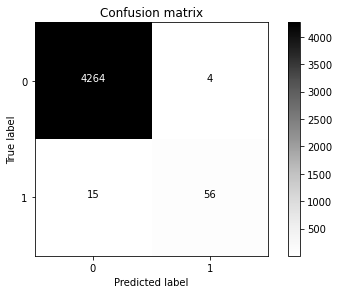

In [ ]:
#Reporte de Matriz de Confusión Modelo BernoulliNB
CM_BernoulliNB = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_BernoulliNB))

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.naive_bayes import GaussianNB

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'var_smoothing':np.logspace(0,-9, num=100)}]

# Se ejecuta la librería GridSearchCV, cv hace referencia al metodo de validación cruzada en este caso K-Folds=4 divide los datos 
# en 4 de secciones de prueba los cuales no se mezclan de forma predeterminada
gaussian = GridSearchCV(
    GaussianNB(),
    parameters,
    cv=4
)
# Entrenamiento del modelo y selección de la combinación óptima de parámetros
gaussian.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)
# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','GaussianNB'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','GaussianNB'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GaussianNB'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GaussianNB'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GaussianNB'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','GaussianNB'] = (time.time() - start_time)


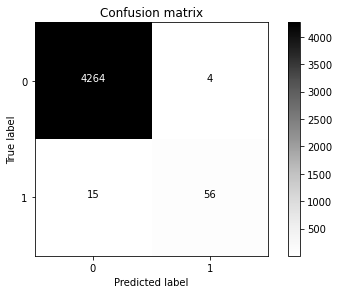

In [ ]:
#Reporte de Matriz de Confusión Modelo GaussianNB
CM_GaussianNB = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_GaussianNB))

## Regresión Logística

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.linear_model import LogisticRegression

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'penalty': ["none","l1", "l2", "elasticnet"],
               'C': [0.0], 
               'solver': [ "lbfgs", "sag", "saga"],
               'class_weight': ['None', 'dict', 'balanced'],
               'random_state': [123],
               'warm_start': ["True"],
               'n_jobs': [-1]}]

# Se ejecuta la librería GridSearchCV
logisticRegression = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv = 4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
logisticRegression.fit(X_train, y_train)
y_pred_test = logisticRegression.predict(X_test)
#
# Evaluación
#
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','LogisticRegresion'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','LogisticRegresion'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticRegresion'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticRegresion'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','LogisticRegresion'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','LogisticRegresion'] = (time.time() - start_time)


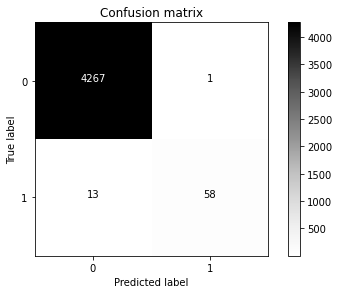

In [ ]:
#Reporte de Matriz de Confusión Modelo LogisticRegresion
CM_LogisticRegresion = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_LogisticRegresion))

## KNN

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=12)
# Se importa la libreria de modelo correspondiente
from sklearn.neighbors import KNeighborsClassifier

#
# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'n_neighbors':[9,10,11],
               'weights': ["uniform","distance"],
               'n_jobs': [-1]}]

# Se ejecuta la librería GridSearchCV
knn = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)


# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','kNN'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','kNN'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','kNN'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','kNN'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','kNN'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','kNN'] = (time.time() - start_time)

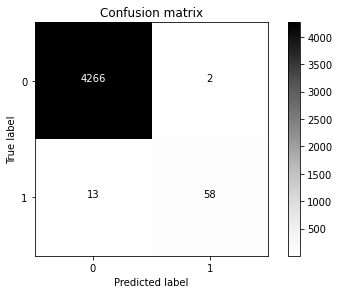

In [ ]:
#Reporte de Matriz de Confusión Modelo kNN
CM_kNN = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_kNN))

## DecisionTreeClassifier

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.tree import DecisionTreeClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'max_depth': np.arange(3, 10),
             'criterion' : ['gini'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}]


# # Se ejecuta la librería GridSearchCV
decisiontree = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
decisiontree.fit(X_train, y_train)
y_pred_test = decisiontree.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','DecisionTree'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','DecisionTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','DecisionTree'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','DecisionTree'] = (time.time() - start_time)


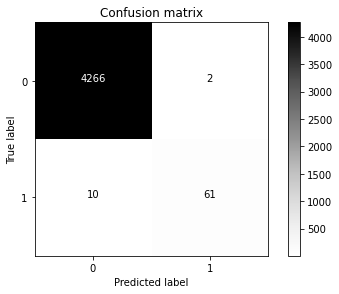

In [ ]:
#Reporte de Matriz de Confusión Modelo DecisionTree
CM_DecisionTree = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_DecisionTree))

## Ensambles de Modelos

In [ ]:
#AdaBoost = AdaBoostClassifier(n_estimators=10)
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import AdaBoostClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'n_estimators':[50,60,70,80]}]

# Se ejecuta la librería GridSearchCV

AdaBoost =  GridSearchCV(
    AdaBoostClassifier(),
    parameters,
    cv=4
)

# AdaBoostClassifier(n_estimators=10)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
AdaBoost.fit(X_train, y_train)
y_pred_test = AdaBoost.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','AdaBoost'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','AdaBoost'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','AdaBoost'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','AdaBoost'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','AdaBoost'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','AdaBoost'] = (time.time() - start_time)


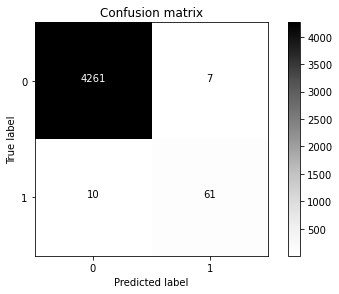

In [ ]:
#Reporte de Matriz de Confusión Modelo AdaBoost
CM_AdaBoost = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_AdaBoost))

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import RandomForestClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'max_depth': [6,7,8],
             'criterion' : ['gini'],
             'n_estimators':[120,140]}]


# Se ejecuta la librería GridSearchCV
RandomForest = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
RandomForest.fit(X_train, y_train)
y_pred_test = RandomForest.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','RandomForest'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RandomForest'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','RandomForest'] = (time.time() - start_time)

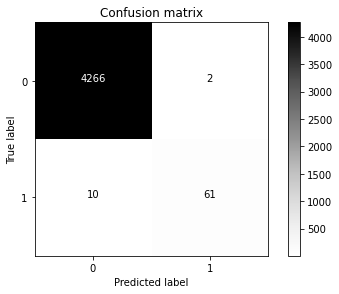

In [ ]:
#Reporte de Matriz de Confusión Modelo RandomForest
CM_RandomForest = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_RandomForest))

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.ensemble import GradientBoostingClassifier

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{}]

# Se ejecuta la librería GridSearchCV
GradientBoosting = GridSearchCV(
    GradientBoostingClassifier(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
GradientBoosting.fit(X_train, y_train)
y_pred_test = GradientBoosting.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','GradientBoosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','GradientBoosting'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','GradientBoosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','GradientBoosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','GradientBoosting'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','GradientBoosting'] = (time.time() - start_time)

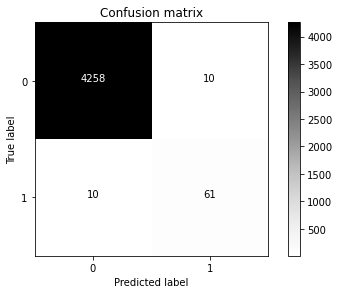

In [ ]:
#Reporte de Matriz de Confusión Modelo GradientBoosting
CM_GradientBoosting = confusion_matrix(y_pred=y_pred_test, y_true=y_test)


plot = (plot_confusion_matrix(CM_GradientBoosting))

## Redes Neuronales

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.neural_network import MLPClassifier

# # Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'hidden_layer_sizes': [(10,)],
               'activation': ['logistic'],
               'solver': ['sgd'],
               'alpha': [0.0],
               'verbose': [False],
               'shuffle': [True],
               'tol': [1e-4],
               'max_iter': [20000],
               'momentum': [0.9],
               'learning_rate': ['adaptive'],
               'learning_rate_init': [0.1],
               'nesterovs_momentum': [False]}]

# Se ejecuta la librería GridSearchCV
RedesNeuronales = GridSearchCV(
    MLPClassifier(),
    parameters,
    cv=4
)

#
# El parámetro hidden_layer_sizes recibe una tupla que
# indica la cantidad de neuronas de cada capa oculta. En
# el caso presentado, el valor (6,) indica que hay una sola
# capa oculta con 6 neuronas que usan la función sigmoidea.
# El parámetro solver = 'sgd' indica que se usará el
# algoritmo de gradiente descendente estocástico para entrenar
# la red neuronal.
#

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
RedesNeuronales.fit(X_train, y_train)
y_pred_test = RedesNeuronales.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','RedesNeuronales'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['f1_score','RedesNeuronales'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RedesNeuronales'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RedesNeuronales'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','RedesNeuronales'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','RedesNeuronales'] = (time.time() - start_time)


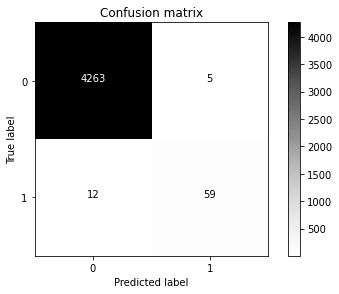

In [ ]:
#Reporte de Matriz de Confusión Modelo RedesNeuronales
CM_RedesNeuronales = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_RedesNeuronales))

## SVC

In [ ]:
# Se importa la libreria de modelo correspondiente
from sklearn.svm import SVC

# Se crean los parametros correspondientes al modelo, esto con el objetivo de optimizarlos por medio de la librería GridSearchCV
parameters = [{'C':np.linspace(0.0,1,3),
               'kernel': ["sigmoid"],
               'gamma': ["scale"]}]
# Se ejecuta la librería GridSearchCV

svc = GridSearchCV(
    SVC(),
    parameters,
    cv=4
)

# Entrenamiento del modelo y selección de la combinación óptima de parámetros
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)

# Evaluación para matriz de confusión
y_test = np.asarray(y_test)
y_pred_test = np.asarray(y_pred_test)

# Calculo del tiempo en ejecución y definición de metricas
start_time = time.time()
metrics.loc['accuracy','SVMs'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
metrics.loc['f1_score','SVMs'] = f1_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','SVMs'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVMs'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['roc_auc_score','SVMs'] = roc_auc_score(y_pred_test, y_test)
metrics.loc['Tiempo de ejecución','SVMs'] = (time.time() - start_time)

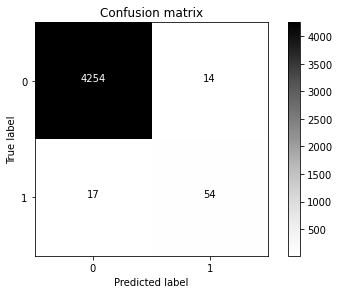

In [ ]:
#Reporte de Matriz de Confusión Modelo SVM
CM_SVM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
plot = (plot_confusion_matrix(CM_SVM))

# Resultados de Modelos

In [ ]:
metrics

,BernoulliNB,GaussianNB,LogisticRegresion,kNN,DecisionTree,AdaBoost,RandomForest,GradientBoosting,RedesNeuronales,SVMs
accuracy,0.995621,0.995621,0.996773,0.996543,0.997234,0.996082,0.997234,0.995391,0.996082,0.992855
f1_score,0.854962,0.854962,0.892308,0.885496,0.910448,0.877698,0.910448,0.859155,0.874074,0.776978
precision,0.933333,0.933333,0.983051,0.966667,0.968254,0.897059,0.968254,0.859155,0.921875,0.794118
recall,0.788732,0.788732,0.816901,0.816901,0.859155,0.859155,0.859155,0.859155,0.830986,0.760563
roc_auc_score,0.964914,0.964914,0.990007,0.981814,0.982958,0.947359,0.982958,0.928406,0.959534,0.895069
Tiempo de ejecución,0.0151353,0.0093329,0.0173194,0.0101638,0.00937653,0.00945067,0.0124705,0.0094142,0.0151067,0.00920081


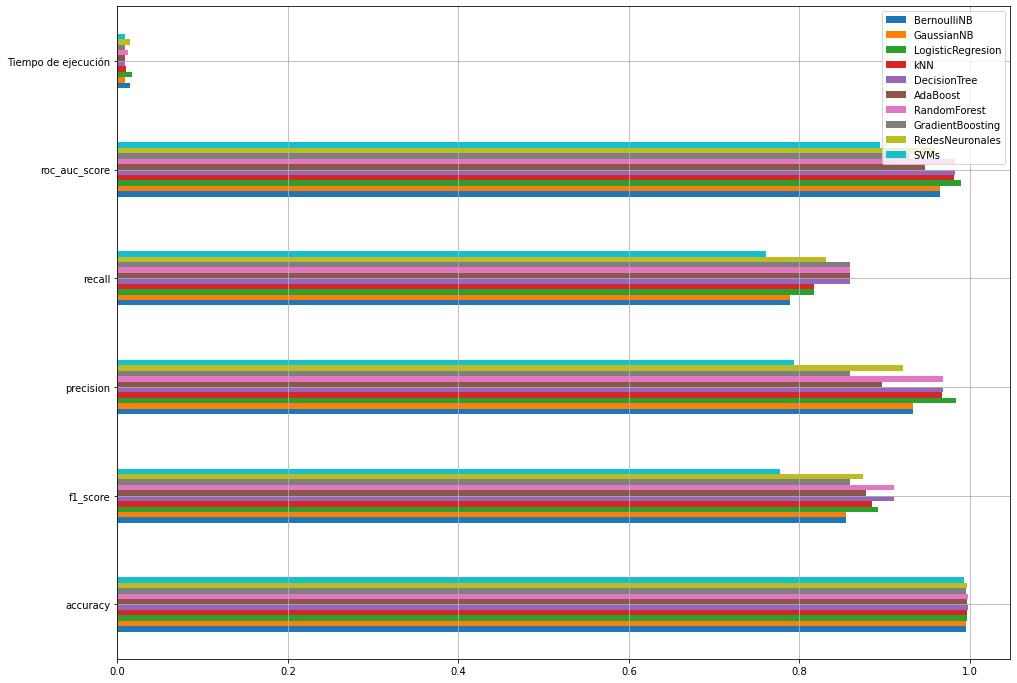

In [ ]:
fig, ax = plt.subplots(figsize = (16, 12))
metrics.plot(kind='barh', ax=ax)
ax.grid();

# Prueba Inputs
# Inputs

In [ ]:
# Prueba de todos los Modelos con un quick_inputs 

Xnew = [[20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0]]
ynew_BernoulliNB = gnb.predict(Xnew)
ynew_GaussianNB = gaussian.predict(Xnew)
ynew_LogisticRegresion = logisticRegression.predict(Xnew)
ynew_kNN = knn.predict(Xnew)
ynew_DecisionTree = decisiontree.predict(Xnew)
ynew_AdaBoost = AdaBoost.predict(Xnew)
ynew_RandomForest = RandomForest.predict(Xnew)
ynew_GradientBoosting = GradientBoosting.predict(Xnew)
ynew_RedesNeuronales = RedesNeuronales.predict(Xnew)
ynew_SVMs = svc.predict(Xnew)

print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_BernoulliNB[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_GaussianNB[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_LogisticRegresion[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_DecisionTree[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_AdaBoost[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_RandomForest[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_GradientBoosting[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_RedesNeuronales[0]))
print("Variables = %s, Predicted = %s" % (Xnew[0], ynew_SVMs[0]))